# Explore British Library News Datasets

This notebook explore the [British Library News Datasets](https://bl.iro.bl.uk/collections/353c908d-b495-4413-b047-87236d2573e3?locale=en). We will:
1. The structure, format and purpose of files in these datasets
2. Analyse the newspapers with metadata
3.

In [1]:
from math import isnan

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

## The Structure, Format and Purpose of files in the Datasets


In [2]:
news_dir = "/Users/lilinyu/Documents/BritishNews"

### Subcollection - Press Directories

Full-text records of historic press directories, listing newspapers and other journals, digitised from the British Library collection. Each file contains the run of a press directory over selected years, with OCR (Optical Character Recognition) text in XML format.


**The Newspaper Press Directory (1846-1920): A Structured and Enriched Dataset**

Mitchell's Newspaper Press Directories contained an almost complete list of newspapers published in England, Wales, Scotland and Ireland. It was published regularly from 1846 onwards and provided a detailed description of the newspaper landscape over time. This version contains a structured, tabular representation of the directories (as CSV or Excel Spreadsheet). Each row describes a newspaper at a specific point in time. We record title, politics, price, location and other information. Please consult the data card for a detailed overview of the data structure and this blog post for more background on the digitisation process. Info available [here](https://bl.iro.bl.uk/concern/datasets/adcef12a-bb3d-40d9-871d-5784022a77e8?locale=en)

In [3]:
press_dir = news_dir + "/press_dir"

In [4]:
## The Newspaper Press Directory (1846-1920): A Structured and Enriched Dataset
mitchell_dir = press_dir + "/mitchell_1846_1920"
mitchell_csv = mitchell_dir + "/Mitchell_1846_1920.csv"
mitchell_df = pd.read_csv(mitchell_csv, index_col=0)
mitchell_df.head()

,ID,CHAIN_ID,YEAR,TITLE,PRICE,POLITICS,ESTABLISHED_DATE,PUBLISED_DATE,PERSONS,ORGANIZATIONS,PLACE_PUB,PLACE_PUB_WIKI,PLACE_PUB_COORD,PLACES,PLACES_TRES,TEXT
0,MPD_1846_57,CID_000000,1846,JUSTICE OF THE PEACE .,6d,NaN,"January 28 , 1837",Saturday,Henry Shaw,NaN,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E..."
1,MPD_1847_65,CID_000000,1847,JUSTICE OF THE PEACE .,6d,NaN,"January 28 , 1837",Saturday,Henry Shaw,NaN,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E..."
2,MPD_1851_67,CID_000000,1851,JUSTICE OF THE PEACE .,6d,NaN,"January 28 , 1837",Saturday,Henry Shaw,NaN,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E..."
3,MPD_1856_86,CID_000000,1856,JUSTICE OF THE PEACE .,5d<SEP>6d,NaN,"January 28 , 1837",Sawrday,Henry Shaw,NaN,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Sawrday , Price 5d . an..."
4,MPD_1857_86,CID_000000,1857,JUSTICE OF THE PEACE .,5d<SEP>6d,NaN,"January 28 , 1837",Sawurday,Robert Shaw,NaN,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Sawurday , Price 5d . a..."


In [36]:
# Convert the date columns to datetime format, forcing errors to NaT
mitchell_df['ESTABLISHED_DATE'] = pd.to_datetime(mitchell_df['ESTABLISHED_DATE'], errors='coerce')
mitchell_df['PUBLISED_DATE'] = pd.to_datetime(mitchell_df['PUBLISED_DATE'], errors='coerce')
# Ensure YEAR values are strings before joining them
mitchell_df['YEAR'] = mitchell_df['YEAR'].astype(str)
mitchell_df['PRICE'] = mitchell_df['PRICE'].astype(str)
mitchell_df.head()

/var/folders/90/2rldflnx33b7rn9zq_xshh9h0000gp/T/ipykernel_55832/431990532.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mitchell_df['PUBLISED_DATE'] = pd.to_datetime(mitchell_df['PUBLISED_DATE'], errors='coerce')


,ID,CHAIN_ID,YEAR,TITLE,PRICE,POLITICS,ESTABLISHED_DATE,PUBLISED_DATE,PERSONS,ORGANIZATIONS,PLACE_PUB,PLACE_PUB_WIKI,PLACE_PUB_COORD,PLACES,PLACES_TRES,TEXT,Clean Title
0,MPD_1846_57,CID_000000,1846,JUSTICE OF THE PEACE .,6d,NaN,1837-01-28,NaT,Henry Shaw,NaN,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E...",justice of the peace
1,MPD_1847_65,CID_000000,1847,JUSTICE OF THE PEACE .,6d,NaN,1837-01-28,NaT,Henry Shaw,NaN,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E...",justice of the peace
2,MPD_1851_67,CID_000000,1851,JUSTICE OF THE PEACE .,6d,NaN,1837-01-28,NaT,Henry Shaw,NaN,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Saturday , Price 6d . E...",justice of the peace
3,MPD_1856_86,CID_000000,1856,JUSTICE OF THE PEACE .,5d<SEP>6d,NaN,1837-01-28,NaT,Henry Shaw,NaN,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Sawrday , Price 5d . an...",justice of the peace
4,MPD_1857_86,CID_000000,1857,JUSTICE OF THE PEACE .,5d<SEP>6d,NaN,1837-01-28,NaT,Robert Shaw,NaN,london,Q84,"(51.507222, -0.1275)","137 , Fetter Lane","[{'mention': 'Fetter Lane', 'pos': 35, 'sent_i...","JUSTICE OF THE PEACE . Sawurday , Price 5d . a...",justice of the peace


In [5]:
len(mitchell_df)

92266

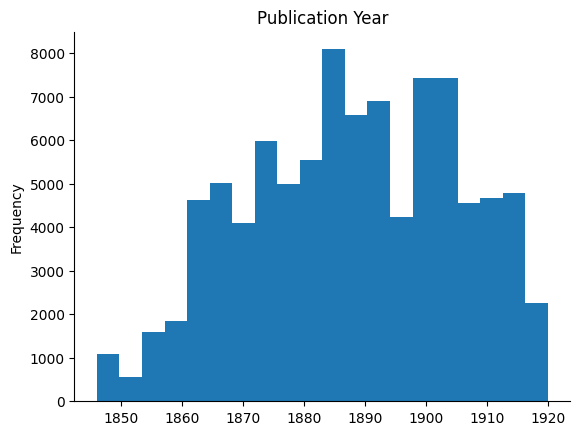

In [6]:
mitchell_df['YEAR'].plot(kind='hist', bins=20, title='Publication Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
titles_list = mitchell_df['TITLE'].unique().tolist()
titles_list

['JUSTICE OF THE PEACE .',
 "LLOYD'S WEEKLY LONDON NEWSPAPER .",
 "LLOYD'S WEEKLY NEWS .",
 "LLOYD'S NEWS .",
 'LONDON COMMERCIAL RECORD .',
 'BRIGHTON HERALD .',
 'BRIGHTON HERALD . ',
 'BRIGETON HERALD .',
 'CAMBRIDGE CHRONICLE .',
 'CAMBRIDGE CHRONICLE AND UNIVERSITY HERALD .',
 'CAMBRIDGE CHRONICLE AND UNIVERSITY JOURNAL .',
 'KENTISH GAZETTE .',
 'KENTISH GAZETTE , AND CANTERBURY TIMES .',
 'KENT HERALD .',
 'KENT HERALD . ',
 'CANTERBURY JOURNAL .',
 'CARLISLE JOURNAL .',
 'CARLISLE JOURNAl .',
 'ESSEX HERALD .',
 'ESSEX HERALD . ',
 'CHELTENHAM LOOKER ON .',
 'CHELTENHAM LOOKER-ON .',
 'CHELTENHAM COUNTY LOOKER-ON .',
 'ESSEX STANDARD .',
 'ESSEX STANDARD . ',
 'ESSEX STANDARD AND EASTERN COUNTIES ADVERTISER .',
 'ESSEX STANDARD , WEST SUFFOLK GAZETTE , AND EASTERN COUNTIES ADVERTISER .',
 'DERBYSHIRE ADVERTISER .',
 'DERBYSHIRE ADVERTISER',
 'DURHAM CHRONICLE .',
 'DURHAM CHRONICLE AND COUNTY GAZETTE .',
 'DURHAM COUNTY GAZETTE .',
 'DURHAM CHRONICLE AND COUNTY GAZETTE . ',
 'E

In [8]:
len(titles_list)

10201

Inconsistent title name in mitchell dataset, for example:
`"LLOYD'S WEEKLY LONDON NEWSPAPER .",
 "LLOYD'S WEEKLY NEWS .",
 "LLOYD'S NEWS .",`

So we cannot directly distinguish two newspapers from titles. How about CHAIN_ID? Let's check how many unique CHAIN_IDs and how many of them has different titles

In [9]:
mitchell_df_chain_id_grouped = mitchell_df.groupby(['CHAIN_ID'])['TITLE'].value_counts()
mitchell_df_chain_id_grouped

CHAIN_ID      TITLE                            
CID_000000    JUSTICE OF THE PEACE .               52
CID_000001    LLOYD'S WEEKLY LONDON NEWSPAPER .    45
              LLOYD'S WEEKLY NEWS .                 7
              LLOYD'S NEWS .                        1
CID_000002    LONDON COMMERCIAL RECORD .           53
                                                   ..
CID_995422    AMPTHILL AND DISTRICT NEWS .          1
CID_996857    GUARDIAN .                            3
CID_997917    GARSTON AND WOOLTON REPORTER .        7
CID_998339    FACTORY TIMES .                       1
March , 1889  ROD AND GUN .                         1
Name: count, Length: 9214, dtype: int64

In [10]:
len(mitchell_df[mitchell_df['CHAIN_ID'].isna()])

1921

In [11]:
len(mitchell_df['CHAIN_ID'].unique())

6622

At the first look, **Chain_id seems to be the more unique and stable key to distinguish two newspapers**, even though there are 1921 records has no chain_id.

To further check how well records are grouped by chain_id, we need to see:
1. if there are duplicated titles across chain_ids

In [22]:
mitchell_df['Clean Title'] = mitchell_df['TITLE'].apply(lambda title: title.lower().strip('. ,') if title and isinstance(title, str) else "")
len(mitchell_df['Clean Title'].unique())

9757

In [51]:
import math
duplicated_titles = []
reference_titles = {}
checked_titles = []
for index, row in mitchell_df.iterrows():
    chain_id = row['CHAIN_ID'] if row['CHAIN_ID'] and isinstance(row['CHAIN_ID'], str) else ""
    title = row['Clean Title'] if row['Clean Title'] else ""
    key = chain_id + title
    established_date = row['ESTABLISHED_DATE']
    if title in checked_titles:
        continue
    if key in reference_titles:
        continue
    reference_titles[key] = {
            "chain_id": chain_id,
            "title": title,
            "year": row['YEAR'],
            "text": row['TEXT'],
            "established_date": established_date
    }
    checked_titles.append(title)

    # check if there is other records with different chain_id but same title
    if title == "":
        continue
    duplicates_df = mitchell_df[(mitchell_df['Clean Title'] == row['Clean Title']) & (mitchell_df['CHAIN_ID'] != row['CHAIN_ID']) & (mitchell_df.index > index)]
    for dup_index, dup_row in duplicates_df.iterrows():
        duplicated_titles.append({
            "chain_id": dup_row['CHAIN_ID'],
            "title": dup_row['Clean Title'],
            "year": dup_row['YEAR'],
            "text": dup_row['TEXT'],
            "established_date": dup_row['ESTABLISHED_DATE'],
            "ref_key":key
        })


In [52]:
len(duplicated_titles)

4152

In [58]:
# Check some duplicated title in the result
duplicated_title_record = duplicated_titles[7]
print(f"Duplicate title: {duplicated_title_record}\n\n")
print(f"The reference record: {reference_titles[duplicated_title_record['ref_key']]}")

Duplicate title: {'chain_id': 'CID_007044', 'title': 'lincolnshire free press', 'year': '1915', 'text': 'LINCOLNSHIRE FREE PRESS . Tuesday , 1d . — Independent . — Established 1847 . localized edition of the Lincolnshire Free Press published Spalding ( see under Spalding )', 'estimated_date': NaT, 'ref_key': 'CID_000086lincolnshire free press'}


The reference record: {'chain_id': 'CID_000086', 'title': 'lincolnshire free press', 'year': '1908', 'text': "LINCOLNSHIRE FREE PRESS . Tuesday , 1d . Independent . — Established October , 1847 . Circulates extensively in Spalding , Boston , Peterborough , Bourne , Holbeach , Long Sutton , Crowland , The Deepings , Lincoln , Grantham , Donington , Wisbech , March , Sleaford , Spilsby , Louth , Horncastle , King 's Lynn , and throughout Lin - colnshire and the border counties generally . It is looked upon as the county paper , and it is one of the best journals for all matters relating to agriculture , especially potato , bulb and flower cultur

After manually checking these duplicated newspapers, we found that some of them are different newspapers despite the same title (such as chain_id: CID_005904, and CID_000042), while some are actually the same newspaper (such as CID_000642 and CID_000084).

Although, it could be confirmed if they are actually duplicated ones by comparing their established_date, however, the established_date is not stable. Therefore, **we assume there is no duplicated titles across chain ids**

Now, I guess although some data is not grouped very well, but each single record should present a newspaper published for a single year. To verify this, we check if there is duplication for the same title and same publication year.


In [68]:
duplicated_records_df = mitchell_df.groupby(['Clean Title'])['YEAR'].value_counts()
duplicated_records_df[duplicated_records_df>1]

Clean Title                   YEAR
acton and chiswick gazette    1896    2
                              1898    2
                              1899    2
                              1900    2
advertiser                    1902    2
                                     ..
woburn and district reporter  1912    2
                              1914    2
                              1915    2
                              1920    2
wotton-under-edge gazette     1895    2
Name: count, Length: 1047, dtype: int64

In [129]:
print(mitchell_df[(mitchell_df['Clean Title'] == "acton and chiswick gazette") & (mitchell_df['YEAR'] == '1900')].to_dict('records'))

[{'ID': 'MPD_1900_437', 'CHAIN_ID': 'CID_003997', 'YEAR': '1900', 'TITLE': 'ACTON AND CHISWICK GAZETTE .', 'PRICE': '1d', 'POLITICS': 'independent', 'ESTABLISHED_DATE': NaT, 'PUBLISED_DATE': NaT, 'PERSONS': nan, 'ORGANIZATIONS': 'Miadlesex County Times Printing and Pub - lishing Co', 'PLACE_PUB': 'acton', 'PLACE_PUB_WIKI': 'Q83609', 'PLACE_PUB_COORD': '(51.510519, -0.262661)', 'PLACES': 'Acton<SEP>Chiswick<SEP>Turnham Green<SEP>Bedford Park<SEP>Gunnersbury<SEP>Western districts', 'PLACES_TRES': "[{'mention': 'Acton', 'pos': 29, 'sent_idx': 0, 'end_pos': 34, 'tag': 'LOC', 'prediction': 'Q83609', 'ed_score': 0.006, 'latlon': [51.510519, -0.262661], 'wkdt_class': 'Q3957'}, {'mention': 'Chiswick', 'pos': 36, 'sent_idx': 0, 'end_pos': 44, 'tag': 'LOC', 'prediction': 'Q845015', 'ed_score': 0.006, 'latlon': [51.4925, -0.2633], 'wkdt_class': 'Q2755753'}, {'mention': 'Turnham Green', 'pos': 46, 'sent_idx': 0, 'end_pos': 59, 'tag': 'LOC', 'prediction': 'Q1065157', 'ed_score': 0.005, 'latlon': [5

We can still see a lot of duplicated records with same title and year, the first record appears to be more accurate one when they have same chain_id.

#### Conclusion

This dataset contains basic and enriched metadata of published newspapers, these metadata are mainly extracted from the OCR scanned "directory cover image"?. These metadata can be added to the metadata we scrapped [below](#subcollection-newspapers).

Although this dataset is not stable in terms of grouping same newspapers together, we can still map them to the items in the below `Newspapers` datasets.

### Subcollection: Newspapers

Full-text records of newspaper titles digitised from the British Library collection. Each file contains the newspaper’s output for one year, with OCR (Optical Character Recognition) text in XML format.

#### Overview - Metadata auto scraped


In [99]:
news_scraped_metadata_df = pd.read_json("newspapers_list.json")
news_scraped_metadata_df.head()

,abstract,date_published,institution,project_name,publisher,place_of_publication,official_url,licence,doi,additional_info,items,earliest_year_available,latest_year_available,creators,title,url
0,Widnes Examiner (1876-1920) was a weekly newsp...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/azh9-fh91,CC0 1.0 Universal Public Domain,10.23636/azh9-fh91,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WidnesExaminer_000...,1876,1916,"[British Library, Living with Machines]",Widnes Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/96c2c51...
1,Weymouth Telegram (1860 - 1901) was a weekly n...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/n215-c511,CC0 1.0 Universal Public Domain,10.23636/n215-c511,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WeymouthTelegram_0...,1862,1901,"[British Library, Living with Machines]",Weymouth Telegram [plaintext],https://bl.iro.bl.uk//concern/datasets/99f9b09...
2,Warrington Examiner (1869-1901) was a weekly n...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/vta8-2687,CC0 1.0 Universal Public Domain,10.23636/vta8-2687,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WarringtonExaminer...,1869,1909,"[British Library, Living with Machines]",Warrington Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/34a6521...
3,The Runcorn Examiner (1870-1954) was a weekly ...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/fw2h-yx85,CC0 1.0 Universal Public Domain,10.23636/fw2h-yx85,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_TheRuncornExaminer...,1870,1920,"[British Library, Living with Machines]",The Runcorn Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/5120800...
4,The file consists of the OCR (Optical Characte...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/x9yz-z134,CC0 1.0 Universal Public Domain,10.23636/x9yz-z134,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WeeklyJournal_0002...,1901,1904,"[British Library, Living with Machines]",Weekly Journal [plaintext],https://bl.iro.bl.uk//concern/datasets/f6021ed...


There are two types of datasets:
1. One with **original ALTO-XML** files
2. One with **plain text files** (title name ends with `[plaintext]`)

Here comes some questions:
**1. How many newspapers for each type?**
**2. Does every type 2 (plain text) datasets has corresponding type 1 (ALTO) dataset?**

In [100]:
news_scraped_metadata_df['type'] = news_scraped_metadata_df['title'].apply(lambda x: 'plain_text' if x.endswith('[plaintext]') or x.endswith('(plaintext)') else 'alto')
news_scraped_metadata_df['base title'] = news_scraped_metadata_df["title"].str.replace(r"\s*[\[\(]plaintext[\]\)]$", "", regex=True)
news_scraped_metadata_df.head()

,abstract,date_published,institution,project_name,publisher,place_of_publication,official_url,licence,doi,additional_info,items,earliest_year_available,latest_year_available,creators,title,url,type,base title
0,Widnes Examiner (1876-1920) was a weekly newsp...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/azh9-fh91,CC0 1.0 Universal Public Domain,10.23636/azh9-fh91,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WidnesExaminer_000...,1876,1916,"[British Library, Living with Machines]",Widnes Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/96c2c51...,plain_text,Widnes Examiner
1,Weymouth Telegram (1860 - 1901) was a weekly n...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/n215-c511,CC0 1.0 Universal Public Domain,10.23636/n215-c511,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WeymouthTelegram_0...,1862,1901,"[British Library, Living with Machines]",Weymouth Telegram [plaintext],https://bl.iro.bl.uk//concern/datasets/99f9b09...,plain_text,Weymouth Telegram
2,Warrington Examiner (1869-1901) was a weekly n...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/vta8-2687,CC0 1.0 Universal Public Domain,10.23636/vta8-2687,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WarringtonExaminer...,1869,1909,"[British Library, Living with Machines]",Warrington Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/34a6521...,plain_text,Warrington Examiner
3,The Runcorn Examiner (1870-1954) was a weekly ...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/fw2h-yx85,CC0 1.0 Universal Public Domain,10.23636/fw2h-yx85,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_TheRuncornExaminer...,1870,1920,"[British Library, Living with Machines]",The Runcorn Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/5120800...,plain_text,The Runcorn Examiner
4,The file consists of the OCR (Optical Characte...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/x9yz-z134,CC0 1.0 Universal Public Domain,10.23636/x9yz-z134,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WeeklyJournal_0002...,1901,1904,"[British Library, Living with Machines]",Weekly Journal [plaintext],https://bl.iro.bl.uk//concern/datasets/f6021ed...,plain_text,Weekly Journal


In [101]:
mask_plain = news_scraped_metadata_df["type"] == "plain_text"
mask_nonplain = news_scraped_metadata_df['type'] == 'alto'

plain_text_datasets_df = news_scraped_metadata_df[mask_plain]
alto_datasets_df = news_scraped_metadata_df[mask_nonplain]
print(f"Number of plain text datasets: {len(plain_text_datasets_df)}, number of ALTO datasets: {len(alto_datasets_df)}")

Number of plain text datasets: 75, number of ALTO datasets: 60


In [102]:
plain_text_news_titles = plain_text_datasets_df['base title'].values.tolist()
unique_plain_text_titles = set(plain_text_news_titles)
print(f"Unique plain text titles: {len(unique_plain_text_titles)}, number of plain text news titles: {len(plain_text_news_titles)}")

Unique plain text titles: 75, number of plain text news titles: 75


In [103]:
alto_news_titles = alto_datasets_df['base title'].values.tolist()
unique_alto_titles = set(alto_news_titles)
print(f"Unique alto titles: {len(unique_alto_titles)}, number of alto news titles: {len(alto_news_titles)}")

Unique alto titles: 60, number of alto news titles: 60


**No duplicated plain text datasets and alto datasets**

In [104]:
matched_alto_datasets_df = alto_datasets_df[alto_datasets_df["title"].isin(plain_text_news_titles)]
unmatched_alto_datasets_df = alto_datasets_df[~alto_datasets_df["title"].isin(plain_text_news_titles)]
print(f"number of matched ALTO datasets: {len(matched_alto_datasets_df)}, number of unmatched ALTO datasets: {len(unmatched_alto_datasets_df)}")

number of matched ALTO datasets: 60, number of unmatched ALTO datasets: 0


In [105]:
matched_alto_titles = matched_alto_datasets_df['title'].values.tolist()
unmatched_plain_text_datasets_df = plain_text_datasets_df[~plain_text_datasets_df["base title"].isin(matched_alto_titles)]
print(f"number of unmatched plain text datasets:  {len(unmatched_plain_text_datasets_df)}")

number of unmatched plain text datasets:  15


In [106]:
total_unique_titles = news_scraped_metadata_df['base title'].unique().tolist()
print(f"Number of unique titles: {len(total_unique_titles)}")

Number of unique titles: 75


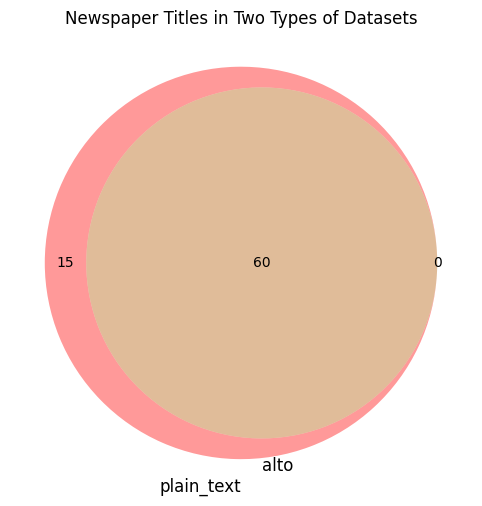

In [107]:
plt.figure(figsize=(6, 6))
venn2([set(plain_text_news_titles), set(alto_news_titles)], set_labels=("plain_text", "alto"))
plt.title("Newspaper Titles in Two Types of Datasets")
plt.show()

As we can see from the figure:
* we have totally 75 newspapers, and they all have plain text datasets
* 60 newspapers have both plain text dataset and alto dataset
* 15 newspapers have only plain text dataset

Questions:
1. what's special about these 15 plain text only datasets?
2. shouldn't every newspaper have at least alto dataset?
3. Do items in all these matched datasets match as well, that's to say, for example, plain text dataset for `Glasgow Courier` has items from  1802 to 1866, and maybe so does it for alto dataset.

In [108]:
# List the titles of unmatched plain text datasets and unmatched alto datasets
print(f"titles of unmatched plain text datasets: {unmatched_plain_text_datasets_df['base title'].values.tolist()}\n\n {'---'*6}\n\n titles of unmatched alto datasets:{unmatched_alto_datasets_df['title'].values.tolist()}")

titles of unmatched plain text datasets: ['The Ripon Observer', 'The Haslingden Gazette', 'The Herald of Wales and Monmouthshire Recorder', 'The Manchester Examiner', 'The Bee-Hive :', 'The Dewsbury Chronicle, and West Riding Advertiser', 'Penistone, Stocksbridge, Hoyland and Ecclesfield & Chapeltown express', 'Nelson Chronicle, Colne Observer, and Clitheroe Division News', 'New Tredegar, Bargoed & Caerphilly Journal', 'Nantwich, Sandbach & Crewe Star', 'Irvine Express', 'Bridgend Chronicle, Cowbridge, Llantrisant, and Maesteg Advertiser', 'Beverley and East Riding Telegraph', 'Bargoed Journal', 'Barnsley Telephone']

 ------------------

 titles of unmatched alto datasets:[]


In [109]:
# list titles, year range in different dataset in all the 60 newspapers who have both types of dataset
news_year_ranges_compare = []
for index, row in matched_alto_datasets_df.iterrows():
    title = row['title']
    year_range_alto = (int(row['earliest_year_available']), int(row['latest_year_available']))
    matched_plain_text_df = plain_text_datasets_df[plain_text_datasets_df['base title'] == title]
    year_range_plain = (int(matched_plain_text_df.iloc[0]['earliest_year_available']), int(matched_plain_text_df.iloc[0]['latest_year_available']))
    if -1 in year_range_alto or -1 in year_range_plain:
        continue
    news_year_ranges_compare.append({
        "title": title,
        "year_range_alto": year_range_alto,
        "year_range_plain": year_range_plain
    })
news_year_ranges_compare

[{'title': 'Stockton Herald, South Durham and Cleveland Advertiser',
  'year_range_alto': (1858, 1901),
  'year_range_plain': (1891, 1918)},
 {'title': 'The Blackpool Gazette & Herald',
  'year_range_alto': (1874, 1879),
  'year_range_plain': (1874, 1919)},
 {'title': 'Darlington & Richmond Herald',
  'year_range_alto': (1870, 1874),
  'year_range_plain': (1870, 1874)},
 {'title': 'Colne Valley Guardian',
  'year_range_alto': (1896, 1901),
  'year_range_plain': (1896, 1906)},
 {'title': 'Widnes Examiner',
  'year_range_alto': (1876, 1901),
  'year_range_plain': (1876, 1916)},
 {'title': 'The Runcorn Examiner',
  'year_range_alto': (1870, 1901),
  'year_range_plain': (1870, 1920)},
 {'title': 'Warrington Examiner',
  'year_range_alto': (1869, 1901),
  'year_range_plain': (1869, 1909)},
 {'title': 'Glasgow Courier',
  'year_range_alto': (1844, 1866),
  'year_range_plain': (1802, 1866)},
 {'title': 'Nuneaton Times',
  'year_range_alto': (1875, 1875),
  'year_range_plain': (1875, 1875)},
 

In [110]:
len(news_year_ranges_compare)

59

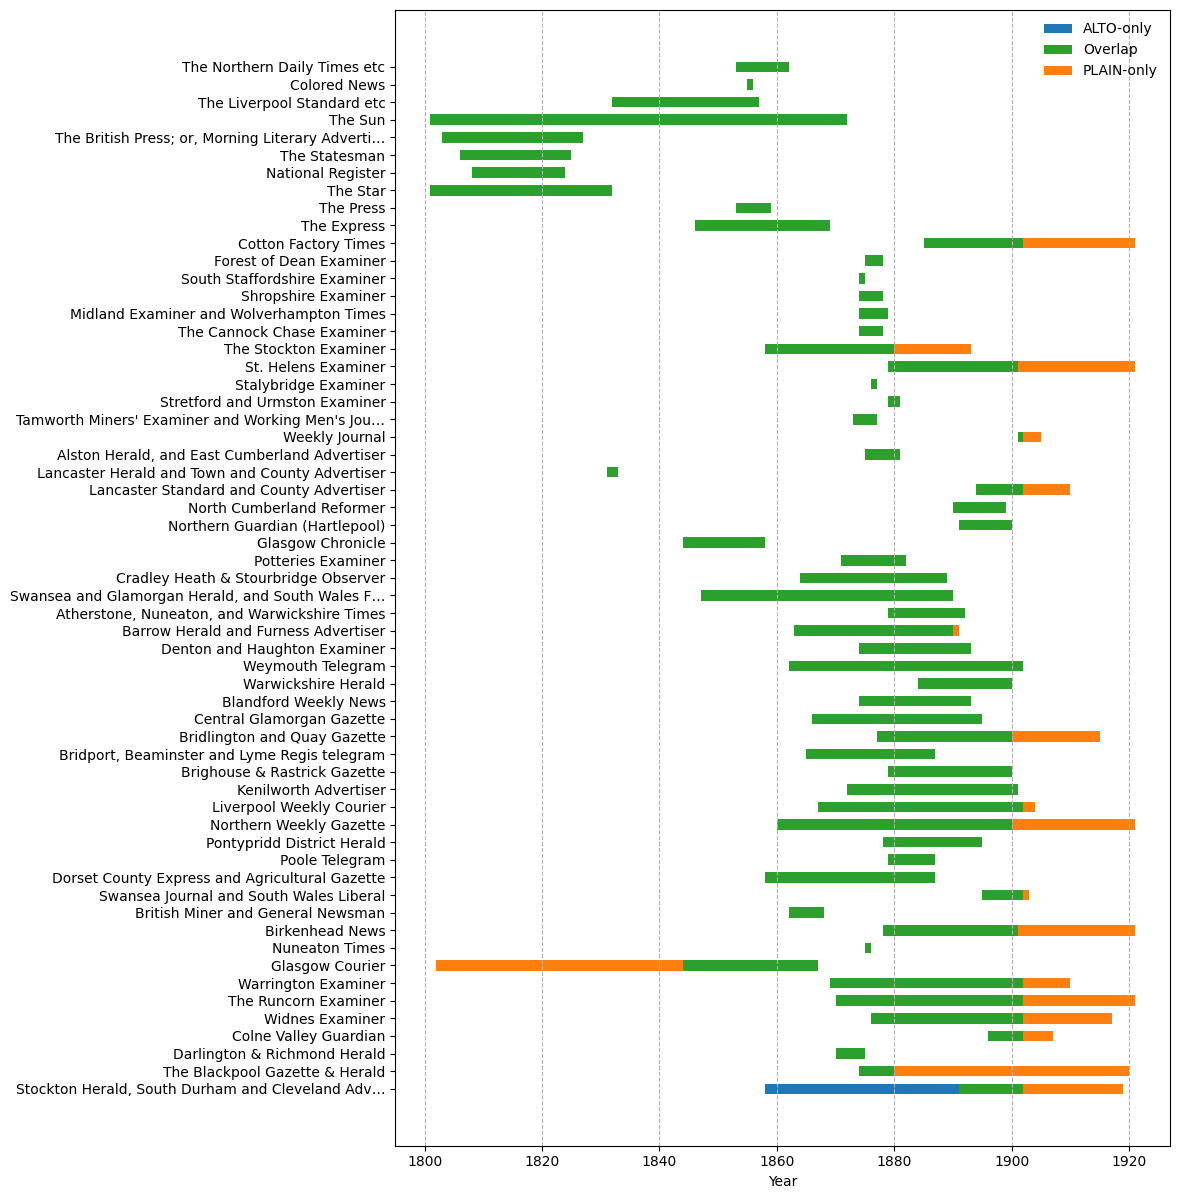

In [111]:
def intersect(a, b):
    s = max(a[0], b[0])
    e = min(a[1], b[1])
    return (s, e) if s <= e else None

def diff(a, b):
    ov = intersect(a, b)
    if not ov:
        return [a]
    res = []
    if a[0] < ov[0]:
        res.append((a[0], ov[0]-1))
    if ov[1] < a[1]:
        res.append((ov[1]+1, a[1]))
    return res

fig, ax = plt.subplots(figsize=(10, len(news_year_ranges_compare) / 4))

yticks, ylabels = [], []

for i, rec in enumerate(news_year_ranges_compare):
    y = i
    title = rec["title"]
    a, p = rec["year_range_alto"], rec["year_range_plain"]
    ov = intersect(a, p)
    alto_only = diff(a, p)
    plain_only = diff(p, a)

    def spans(segs):  # convert to (start, width)
        return [(s, e-s+1) for s, e in segs]

    # ALTO-only in blue
    ax.broken_barh(spans(alto_only), (y-0.3, 0.6), facecolors="tab:blue", label="ALTO-only" if i==0 else "")
    # Overlap in green
    if ov:
        ax.broken_barh(spans([ov]), (y-0.3, 0.6), facecolors="tab:green", label="Overlap" if i==0 else "")
    # PLAIN-only in orange
    ax.broken_barh(spans(plain_only), (y-0.3, 0.6), facecolors="tab:orange", label="PLAIN-only" if i==0 else "")

    yticks.append(y)
    ylabels.append(title if len(title) < 50 else title[:47] + "…")

ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
ax.set_xlabel("Year")
ax.legend(loc="upper right", frameon=False)
ax.grid(True, axis="x", linestyle="--")

plt.show()

In [112]:
same_range_count = 0
more_plain_years_count = 0
for i, rec in enumerate(news_year_ranges_compare):
    y = i
    title = rec["title"]
    a, p = rec["year_range_alto"], rec["year_range_plain"]
    ov = intersect(a, p)
    alto_only = diff(a, p)
    plain_only = diff(p, a)
    if len(alto_only) == 0:
        if len(plain_only) == 0:
            same_range_count += 1
        else:
            more_plain_years_count += 1

print(f"same range count: {same_range_count} (ratio: {same_range_count/len(news_year_ranges_compare)}, more plain years count: {more_plain_years_count} (ratio: {more_plain_years_count/len(news_year_ranges_compare)}, total newspaper: {len(news_year_ranges_compare)}")

same range count: 41 (ratio: 0.6949152542372882, more plain years count: 17 (ratio: 0.288135593220339, total newspaper: 59


As the figure shows, almost 70% newspapers have items for same year ranges, and nearly 29% have plain text dataset have more years covered, only Stockten Herald has year ranges covered only in one of the datasets.

Since we used the filename of items to get the years available for each dataset (e.g. BLNewspapers_0002083_TheNorthernDailyTimes_1853.zip -> year 1853, different items in one dataset represent data for different years ), this means the year range reflects the number of items of a dataset.

Still, we can **list the number of items for each newspaper in its plain text dataset**

In [113]:
plain_text_datasets_df['number of items'] = plain_text_datasets_df['items'].apply(lambda x: len(x))
plain_text_datasets_df

/var/folders/90/2rldflnx33b7rn9zq_xshh9h0000gp/T/ipykernel_55832/2871308429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plain_text_datasets_df['number of items'] = plain_text_datasets_df['items'].apply(lambda x: len(x))


,abstract,date_published,institution,project_name,publisher,place_of_publication,official_url,licence,doi,additional_info,items,earliest_year_available,latest_year_available,creators,title,url,type,base title,number of items
0,Widnes Examiner (1876-1920) was a weekly newsp...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/azh9-fh91,CC0 1.0 Universal Public Domain,10.23636/azh9-fh91,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WidnesExaminer_000...,1876,1916,"[British Library, Living with Machines]",Widnes Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/96c2c51...,plain_text,Widnes Examiner,38
1,Weymouth Telegram (1860 - 1901) was a weekly n...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/n215-c511,CC0 1.0 Universal Public Domain,10.23636/n215-c511,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WeymouthTelegram_0...,1862,1901,"[British Library, Living with Machines]",Weymouth Telegram [plaintext],https://bl.iro.bl.uk//concern/datasets/99f9b09...,plain_text,Weymouth Telegram,27
2,Warrington Examiner (1869-1901) was a weekly n...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/vta8-2687,CC0 1.0 Universal Public Domain,10.23636/vta8-2687,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WarringtonExaminer...,1869,1909,"[British Library, Living with Machines]",Warrington Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/34a6521...,plain_text,Warrington Examiner,37
3,The Runcorn Examiner (1870-1954) was a weekly ...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/fw2h-yx85,CC0 1.0 Universal Public Domain,10.23636/fw2h-yx85,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_TheRuncornExaminer...,1870,1920,"[British Library, Living with Machines]",The Runcorn Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/5120800...,plain_text,The Runcorn Examiner,44
4,The file consists of the OCR (Optical Characte...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/x9yz-z134,CC0 1.0 Universal Public Domain,10.23636/x9yz-z134,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WeeklyJournal_0002...,1901,1904,"[British Library, Living with Machines]",Weekly Journal [plaintext],https://bl.iro.bl.uk//concern/datasets/f6021ed...,plain_text,Weekly Journal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,The British Press (1803-1826) was a daily news...,2025-06-17,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/mjqq-m146,CC0 1.0 Universal Public Domain,10.23636/mjqq-m146,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_TheBritishPressorM...,1803,1826,"[British Library, Living with Machines]","The British Press; or, Morning Literary Advert...",https://bl.iro.bl.uk//concern/datasets/1c318f5...,plain_text,"The British Press; or, Morning Literary Advert...",22
71,The Press (1853-1866) was a weekly conservativ...,2025-06-17,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/mwn3-bc46,CC0 1.0 Universal Public Domain,10.23636/mwn3-bc46,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_ThePress_0002645_1...,1853,1858,"[British Library, Living with Machines]",The Press (plaintext),https://bl.iro.bl.uk//concern/datasets/6b2fca2...,plain_text,The Press,6
72,The National Register (1808-1823) was a Conser...,2025-06-17,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/4m0d-4h34,CC0 1.0 Universal Public Domain,10.23636/4m0d-4h34,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_NationalRegister_0...,1808,1823,"[British Library, Living with Machines]",National Regis

In [114]:
alto_datasets_df['number of items'] = alto_datasets_df['items'].apply(lambda x: len(x))
alto_datasets_df

/var/folders/90/2rldflnx33b7rn9zq_xshh9h0000gp/T/ipykernel_55832/3304468142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alto_datasets_df['number of items'] = alto_datasets_df['items'].apply(lambda x: len(x))


,abstract,date_published,institution,project_name,publisher,place_of_publication,official_url,licence,doi,additional_info,items,earliest_year_available,latest_year_available,creators,title,url,type,base title,number of items
75,"Stockton Herald, South Durham and Cleveland Ad...",2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/n6w0-8763,CC0 1.0 Universal Public Domain,10.23636/n6w0-8763,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_Stockton_HeraldSou...,1858,1901,[British Library],"Stockton Herald, South Durham and Cleveland Ad...",https://bl.iro.bl.uk//concern/datasets/c399bc4...,alto,"Stockton Herald, South Durham and Cleveland Ad...",44
76,The Blackpool Gazette & Herald (1874 - 1919) w...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/pwp6-m253,CC0 1.0 Universal Public Domain,10.23636/pwp6-m253,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_TheBlackpoolGazett...,1874,1879,[British Library],The Blackpool Gazette & Herald,https://bl.iro.bl.uk//concern/datasets/e385dfc...,alto,The Blackpool Gazette & Herald,5
77,Darlington & Richmond Herald was a weekly news...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/0ra5-p873,CC0 1.0 Universal Public Domain,10.23636/0ra5-p873,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_The_Darlington_Sto...,1870,1874,[British Library],Darlington & Richmond Herald,https://bl.iro.bl.uk//concern/datasets/f88c6a0...,alto,Darlington & Richmond Herald,3
78,Colne Valley Guardian was a weekly newspaper w...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/x6c7-cs03,CC0 1.0 Universal Public Domain,10.23636/x6c7-cs03,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_ColneValleyGuardia...,1896,1901,[British Library],Colne Valley Guardian,https://bl.iro.bl.uk//concern/datasets/edcbd1f...,alto,Colne Valley Guardian,6
79,Widnes Examiner (1876-1920) was a weekly newsp...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/gp3h-te03,CC0 1.0 Universal Public Domain,10.23636/gp3h-te03,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_WidnesExaminer_000...,1876,1901,[British Library],Widnes Examiner,https://bl.iro.bl.uk//concern/datasets/027b1e1...,alto,Widnes Examiner,23
80,The Runcorn Examiner (1870-1954) was a weekly ...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/rv8h-9935,CC0 1.0 Universal Public Domain,10.23636/rv8h-9935,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_RuncornandWidnesEx...,1870,1901,[British Library],The Runcorn Examiner,https://bl.iro.bl.uk//concern/datasets/f4761b2...,alto,The Runcorn Examiner,26
81,Warrington Examiner (1869-1901) was a weekly n...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/0dhc-xk71,CC0 1.0 Universal Public Domain,10.23636/0dhc-xk71,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_TheWarringtonExami...,1869,1901,[British Library],Warrington Examiner,https://bl.iro.bl.uk//concern/datasets/2e4efac...,alto,Warrington Examiner,28
82,Glasgow Courier was a thrice weekly/bi-weekly ...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/mv07-hv86,CC0 1.0 Universal Public Domain,10.23636/mv07-hv86,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_GlasgowCourier_000...,1844,1866,[British Library],Glasgow Courier,https://bl.iro.bl.uk//concern/datasets/e4a924f...,alto,Glasgow Courier,18
83,The Halifax Local Opinion was a weekly newspap...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/2re8-ph79,CC0 1.0 Universal Public Domain,10.23636/2re8-ph79,The file consists of the OCR (Optical Characte...,[],-1,-1,[British Librar

In [117]:
num_items_list = plain_text_datasets_df[['base title', 'number of items']].to_dict("records")
num_items_list = sorted(num_items_list, key=lambda i: i['number of items'])
num_items_list

[{'base title': 'The Manchester Examiner', 'number of items': 1},
 {'base title': 'Stalybridge Examiner', 'number of items': 1},
 {'base title': 'South Staffordshire Examiner', 'number of items': 1},
 {'base title': 'Nuneaton Times', 'number of items': 1},
 {'base title': 'New Tredegar, Bargoed & Caerphilly Journal',
  'number of items': 1},
 {'base title': 'Colored News', 'number of items': 1},
 {'base title': 'Stretford and Urmston Examiner', 'number of items': 2},
 {'base title': 'Lancaster Herald and Town and County Advertiser',
  'number of items': 2},
 {'base title': 'Barnsley Telephone', 'number of items': 2},
 {'base title': 'Swansea Journal and South Wales Liberal',
  'number of items': 3},
 {'base title': 'Nantwich, Sandbach & Crewe Star', 'number of items': 3},
 {'base title': 'Forest of Dean Examiner', 'number of items': 3},
 {'base title': 'Darlington & Richmond Herald', 'number of items': 3},
 {'base title': 'Weekly Journal', 'number of items': 4},
 {'base title': 'The Ca

In [119]:
# If the total number of items for one newspaper in plain text dataset is larger than in alto dataset, that further confirms plain text dataset has better coverage.
num_items_alto = alto_datasets_df[['base title', 'number of items']].to_dict("records")
for n_alto in num_items_alto:
    title = n_alto['base title']
    num_items = n_alto['number of items']
    num_items_p = 0
    for n_plain in num_items_list:
        if n_plain['base title'] == title:
            num_items_p = n_plain['number of items']
            break
    if num_items_p < num_items:
        print(f"for newspaper {title}, alto dataset has {num_items} items, while plain dataset has {num_items_p} items")

for newspaper Stockton Herald, South Durham and Cleveland Advertiser, alto dataset has 44 items, while plain dataset has 26 items
for newspaper Central Glamorgan Gazette, alto dataset has 30 items, while plain dataset has 29 items
for newspaper Warwickshire Herald, alto dataset has 15 items, while plain dataset has 14 items


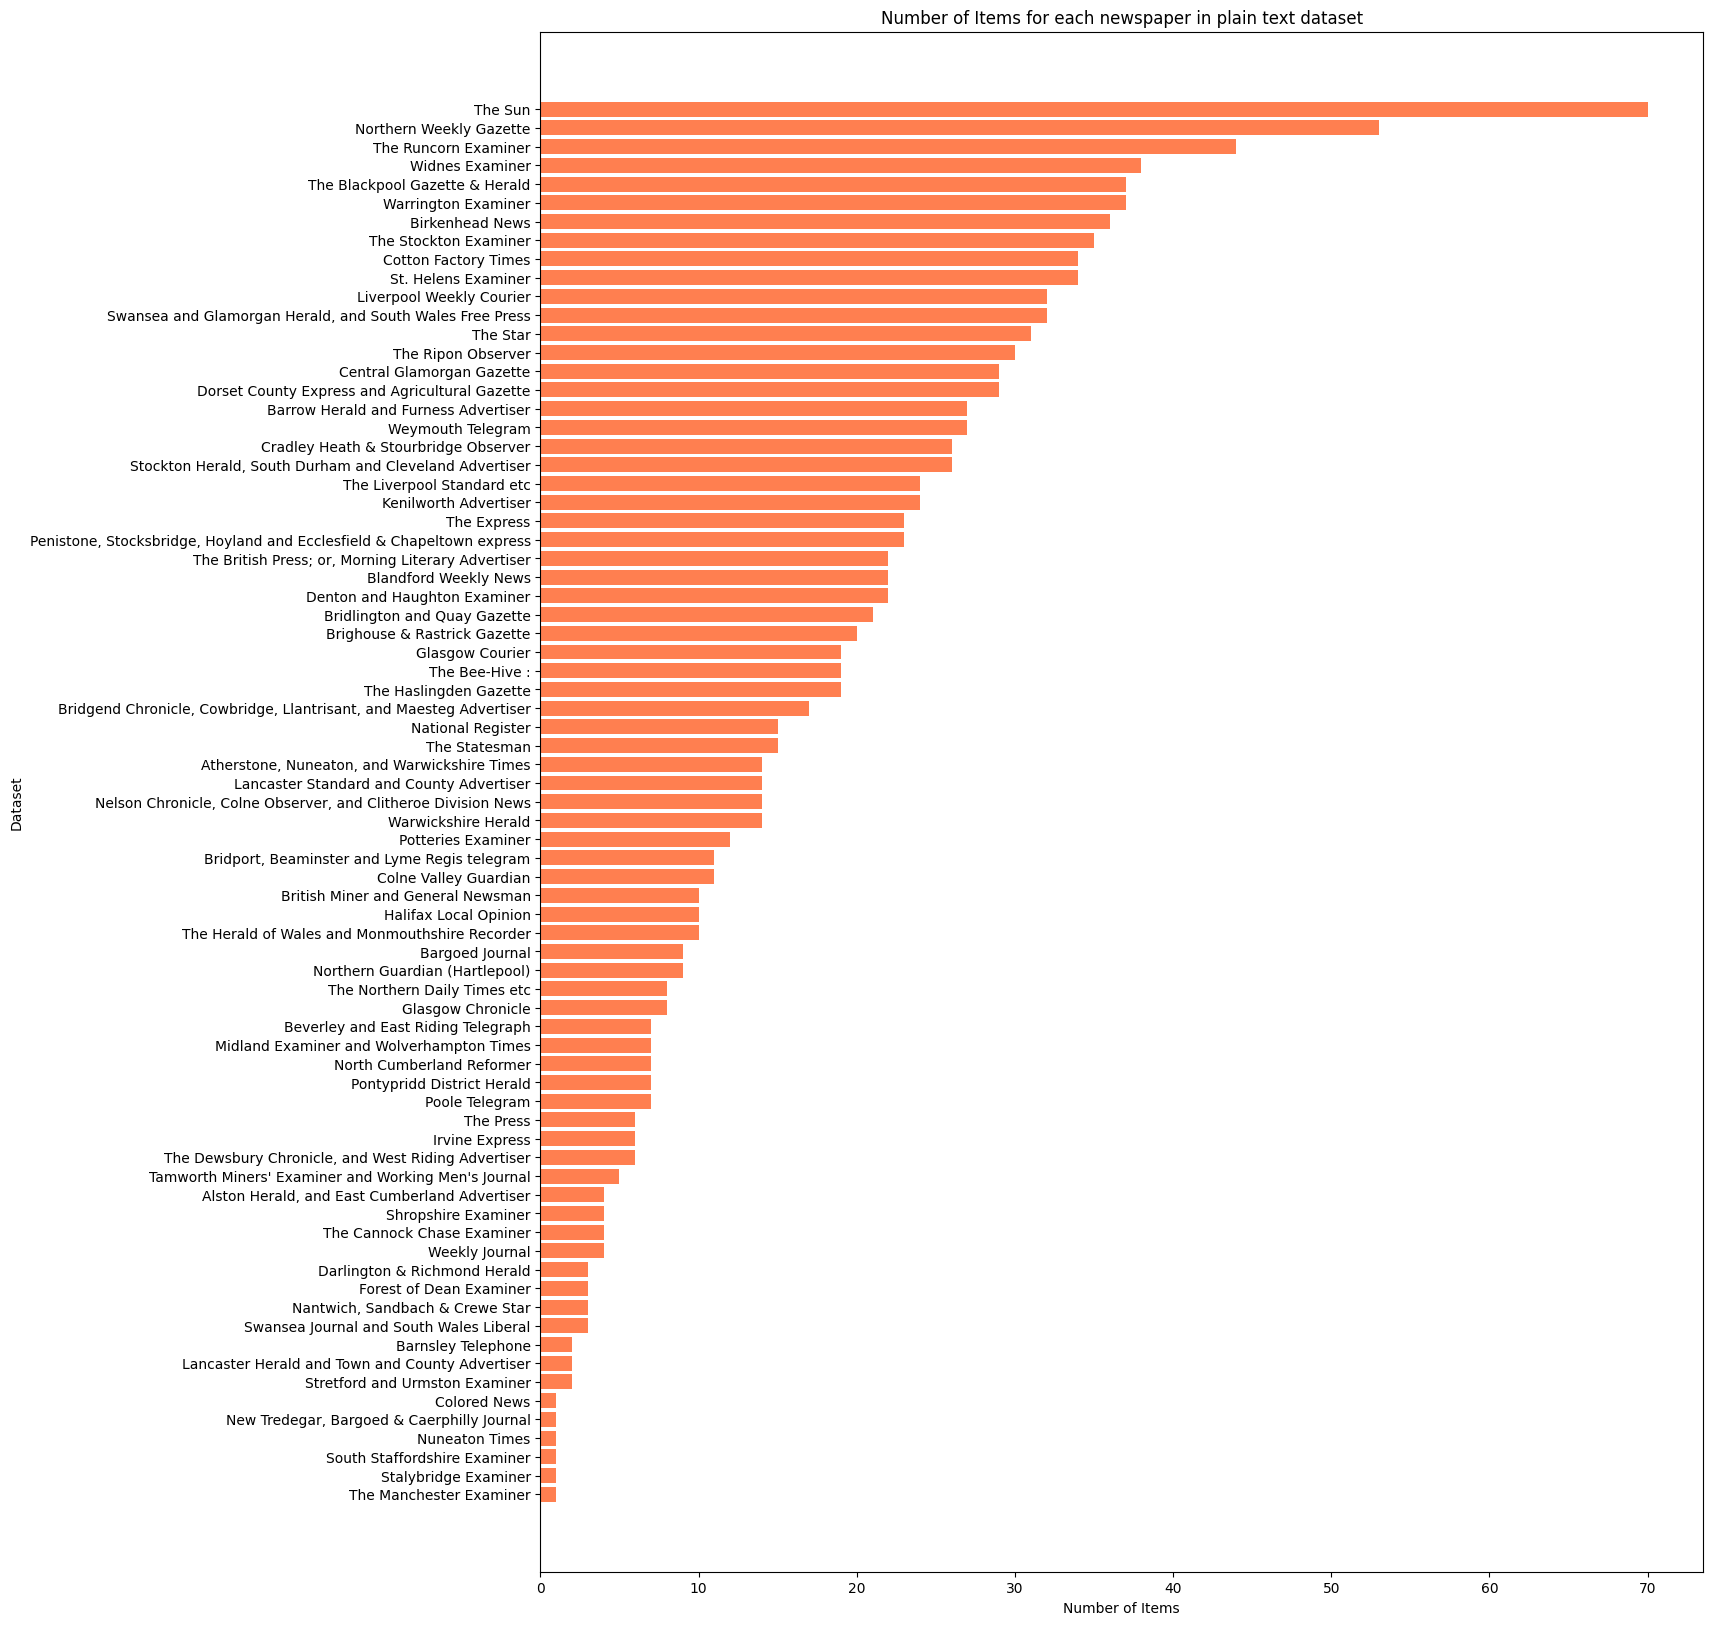

In [30]:
titles = [item["base title"] for item in num_items_list]
counts = [item['number of items'] for item in num_items_list]
plt.figure(figsize=(15, 20))
plt.barh(titles, counts, color='coral')
plt.xlabel('Number of Items')
plt.ylabel('Dataset')
plt.title('Number of Items for each newspaper in plain text dataset')
plt.show()

In [32]:
total_num_items = plain_text_datasets_df['number of items'].sum()
total_num_items

np.int64(1264)

I am expecting that `Glassgow Courier` appears to the top as its long year range, however, it does not have that many items. After checking the items manually, we found that even if it has item for 1802, but items for 1803-1843 are missing. This means **the year range we calculated does not necessary reflects that items in these years are all available.**


Now, let's have a look at the file size of each dataset. Note that, the file size here refers to one for the zip files, not uncompressed ones.

In [33]:
def size_to_mb(size: float, unit="mb") -> float:
    unit = unit.lower()
    if unit == 'b':
        return size / 1024 / 1024
    if unit == 'kb':
        return size / 1024
    if unit == 'gb':
        return size * 1024
    return size

def get_total_filesize_mb(items):
    total_size = 0
    for item in items:
        total_size += size_to_mb(float(item['file_size']), item['file_size_unit'])
    return total_size

plain_text_datasets_df['total size in mb'] = plain_text_datasets_df['items'].apply(lambda x: get_total_filesize_mb(x))
plain_text_datasets_df

/var/folders/90/2rldflnx33b7rn9zq_xshh9h0000gp/T/ipykernel_51358/4099302201.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plain_text_datasets_df['total size in mb'] = plain_text_datasets_df['items'].apply(lambda x: get_total_filesize_mb(x))


,abstract,date_published,institution,project_name,publisher,place_of_publication,official_url,licence,doi,additional_info,items,earliest_year_available,latest_year_available,creators,title,url,type,base title,number of items,total size in mb
0,Widnes Examiner (1876-1920) was a weekly newsp...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/azh9-fh91,CC0 1.0 Universal Public Domain,10.23636/azh9-fh91,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WidnesExaminer_000...,1876,1916,"[British Library, Living with Machines]",Widnes Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/96c2c51...,plain_text,Widnes Examiner,38,735.000000
1,Weymouth Telegram (1860 - 1901) was a weekly n...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/n215-c511,CC0 1.0 Universal Public Domain,10.23636/n215-c511,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WeymouthTelegram_0...,1862,1901,"[British Library, Living with Machines]",Weymouth Telegram [plaintext],https://bl.iro.bl.uk//concern/datasets/99f9b09...,plain_text,Weymouth Telegram,27,403.400000
2,Warrington Examiner (1869-1901) was a weekly n...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/vta8-2687,CC0 1.0 Universal Public Domain,10.23636/vta8-2687,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WarringtonExaminer...,1869,1909,"[British Library, Living with Machines]",Warrington Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/34a6521...,plain_text,Warrington Examiner,37,587.700000
3,The Runcorn Examiner (1870-1954) was a weekly ...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/fw2h-yx85,CC0 1.0 Universal Public Domain,10.23636/fw2h-yx85,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_TheRuncornExaminer...,1870,1920,"[British Library, Living with Machines]",The Runcorn Examiner [plaintext],https://bl.iro.bl.uk//concern/datasets/5120800...,plain_text,The Runcorn Examiner,44,812.400000
4,The file consists of the OCR (Optical Characte...,2025-06-16,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/x9yz-z134,CC0 1.0 Universal Public Domain,10.23636/x9yz-z134,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_WeeklyJournal_0002...,1901,1904,"[British Library, Living with Machines]",Weekly Journal [plaintext],https://bl.iro.bl.uk//concern/datasets/f6021ed...,plain_text,Weekly Journal,4,55.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,The British Press (1803-1826) was a daily news...,2025-06-17,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/mjqq-m146,CC0 1.0 Universal Public Domain,10.23636/mjqq-m146,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_TheBritishPressorM...,1803,1826,"[British Library, Living with Machines]","The British Press; or, Morning Literary Advert...",https://bl.iro.bl.uk//concern/datasets/1c318f5...,plain_text,"The British Press; or, Morning Literary Advert...",22,443.864258
71,The Press (1853-1866) was a weekly conservativ...,2025-06-17,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/mwn3-bc46,CC0 1.0 Universal Public Domain,10.23636/mwn3-bc46,This dataset contains full text and metadata a...,[{'filename': 'BLNewspapers_ThePress_0002645_1...,1853,1858,"[British Library, Living with Machines]",The Press (plaintext),https://bl.iro.bl.uk//concern/datasets/6b2fca2...,plain_text,The Press,6,76.200000
72,The National Register (1808-1823) was a Conser...,2025-06-17,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/4m0d-4h34,CC0 1.0 Universal Public Domain,10.23636/4m0d-4h34,This dataset contains full text and metadata a...,[{'filename': 'BLNew

In [34]:
alto_datasets_df['total size in mb'] = alto_datasets_df['items'].apply(lambda x: get_total_filesize_mb(x))
alto_datasets_df

/var/folders/90/2rldflnx33b7rn9zq_xshh9h0000gp/T/ipykernel_51358/4217254871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alto_datasets_df['total size in mb'] = alto_datasets_df['items'].apply(lambda x: get_total_filesize_mb(x))


,abstract,date_published,institution,project_name,publisher,place_of_publication,official_url,licence,doi,additional_info,items,earliest_year_available,latest_year_available,creators,title,url,type,base title,total size in mb
75,"Stockton Herald, South Durham and Cleveland Ad...",2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/n6w0-8763,CC0 1.0 Universal Public Domain,10.23636/n6w0-8763,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_Stockton_HeraldSou...,1858,1901,[British Library],"Stockton Herald, South Durham and Cleveland Ad...",https://bl.iro.bl.uk//concern/datasets/c399bc4...,alto,"Stockton Herald, South Durham and Cleveland Ad...",4021.000000
76,The Blackpool Gazette & Herald (1874 - 1919) w...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/pwp6-m253,CC0 1.0 Universal Public Domain,10.23636/pwp6-m253,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_TheBlackpoolGazett...,1874,1879,[British Library],The Blackpool Gazette & Herald,https://bl.iro.bl.uk//concern/datasets/e385dfc...,alto,The Blackpool Gazette & Herald,23654.400000
77,Darlington & Richmond Herald was a weekly news...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/0ra5-p873,CC0 1.0 Universal Public Domain,10.23636/0ra5-p873,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_The_Darlington_Sto...,1870,1874,[British Library],Darlington & Richmond Herald,https://bl.iro.bl.uk//concern/datasets/f88c6a0...,alto,Darlington & Richmond Herald,294.000000
78,Colne Valley Guardian was a weekly newspaper w...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/x6c7-cs03,CC0 1.0 Universal Public Domain,10.23636/x6c7-cs03,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_ColneValleyGuardia...,1896,1901,[British Library],Colne Valley Guardian,https://bl.iro.bl.uk//concern/datasets/edcbd1f...,alto,Colne Valley Guardian,13814.400000
79,Widnes Examiner (1876-1920) was a weekly newsp...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/gp3h-te03,CC0 1.0 Universal Public Domain,10.23636/gp3h-te03,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_WidnesExaminer_000...,1876,1901,[British Library],Widnes Examiner,https://bl.iro.bl.uk//concern/datasets/027b1e1...,alto,Widnes Examiner,2630.000000
80,The Runcorn Examiner (1870-1954) was a weekly ...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/rv8h-9935,CC0 1.0 Universal Public Domain,10.23636/rv8h-9935,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_RuncornandWidnesEx...,1870,1901,[British Library],The Runcorn Examiner,https://bl.iro.bl.uk//concern/datasets/f4761b2...,alto,The Runcorn Examiner,2765.000000
81,Warrington Examiner (1869-1901) was a weekly n...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/0dhc-xk71,CC0 1.0 Universal Public Domain,10.23636/0dhc-xk71,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_TheWarringtonExami...,1869,1901,[British Library],Warrington Examiner,https://bl.iro.bl.uk//concern/datasets/2e4efac...,alto,Warrington Examiner,2703.000000
82,Glasgow Courier was a thrice weekly/bi-weekly ...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/mv07-hv86,CC0 1.0 Universal Public Domain,10.23636/mv07-hv86,The file consists of the OCR (Optical Characte...,[{'filename': 'BLNewspapers_GlasgowCourier_000...,1844,1866,[British Library],Glasgow Courier,https://bl.iro.bl.uk//concern/datasets/e4a924f...,alto,Glasgow Courier,3128.000000
83,The Halifax Local Opinion was a weekly newspap...,2022,British Library,Living with Machines,British Library,UK,https://doi.org/10.23636/2re8-ph79,CC0 1.0 Universal Public Domain,10.23636/2re8-ph

In [35]:
size_list = plain_text_datasets_df[['base title', 'total size in mb']].to_dict('records')
size_list = sorted(size_list, key=lambda i: i['total size in mb'])
size_list

[{'base title': 'New Tredegar, Bargoed & Caerphilly Journal',
  'total size in mb': 0.927734375},
 {'base title': 'Barnsley Telephone', 'total size in mb': 1.240234375},
 {'base title': 'Colored News', 'total size in mb': 1.3},
 {'base title': 'Stalybridge Examiner', 'total size in mb': 2.4},
 {'base title': 'Nuneaton Times', 'total size in mb': 6.9},
 {'base title': 'South Staffordshire Examiner', 'total size in mb': 7.8},
 {'base title': 'Stretford and Urmston Examiner', 'total size in mb': 12.3},
 {'base title': 'Swansea Journal and South Wales Liberal',
  'total size in mb': 12.4},
 {'base title': 'Lancaster Herald and Town and County Advertiser',
  'total size in mb': 21.1},
 {'base title': 'Nantwich, Sandbach & Crewe Star',
  'total size in mb': 22.200000000000003},
 {'base title': "Tamworth Miners' Examiner and Working Men's Journal",
  'total size in mb': 33.659765625},
 {'base title': 'The Manchester Examiner', 'total size in mb': 34.0},
 {'base title': 'Alston Herald, and Eas

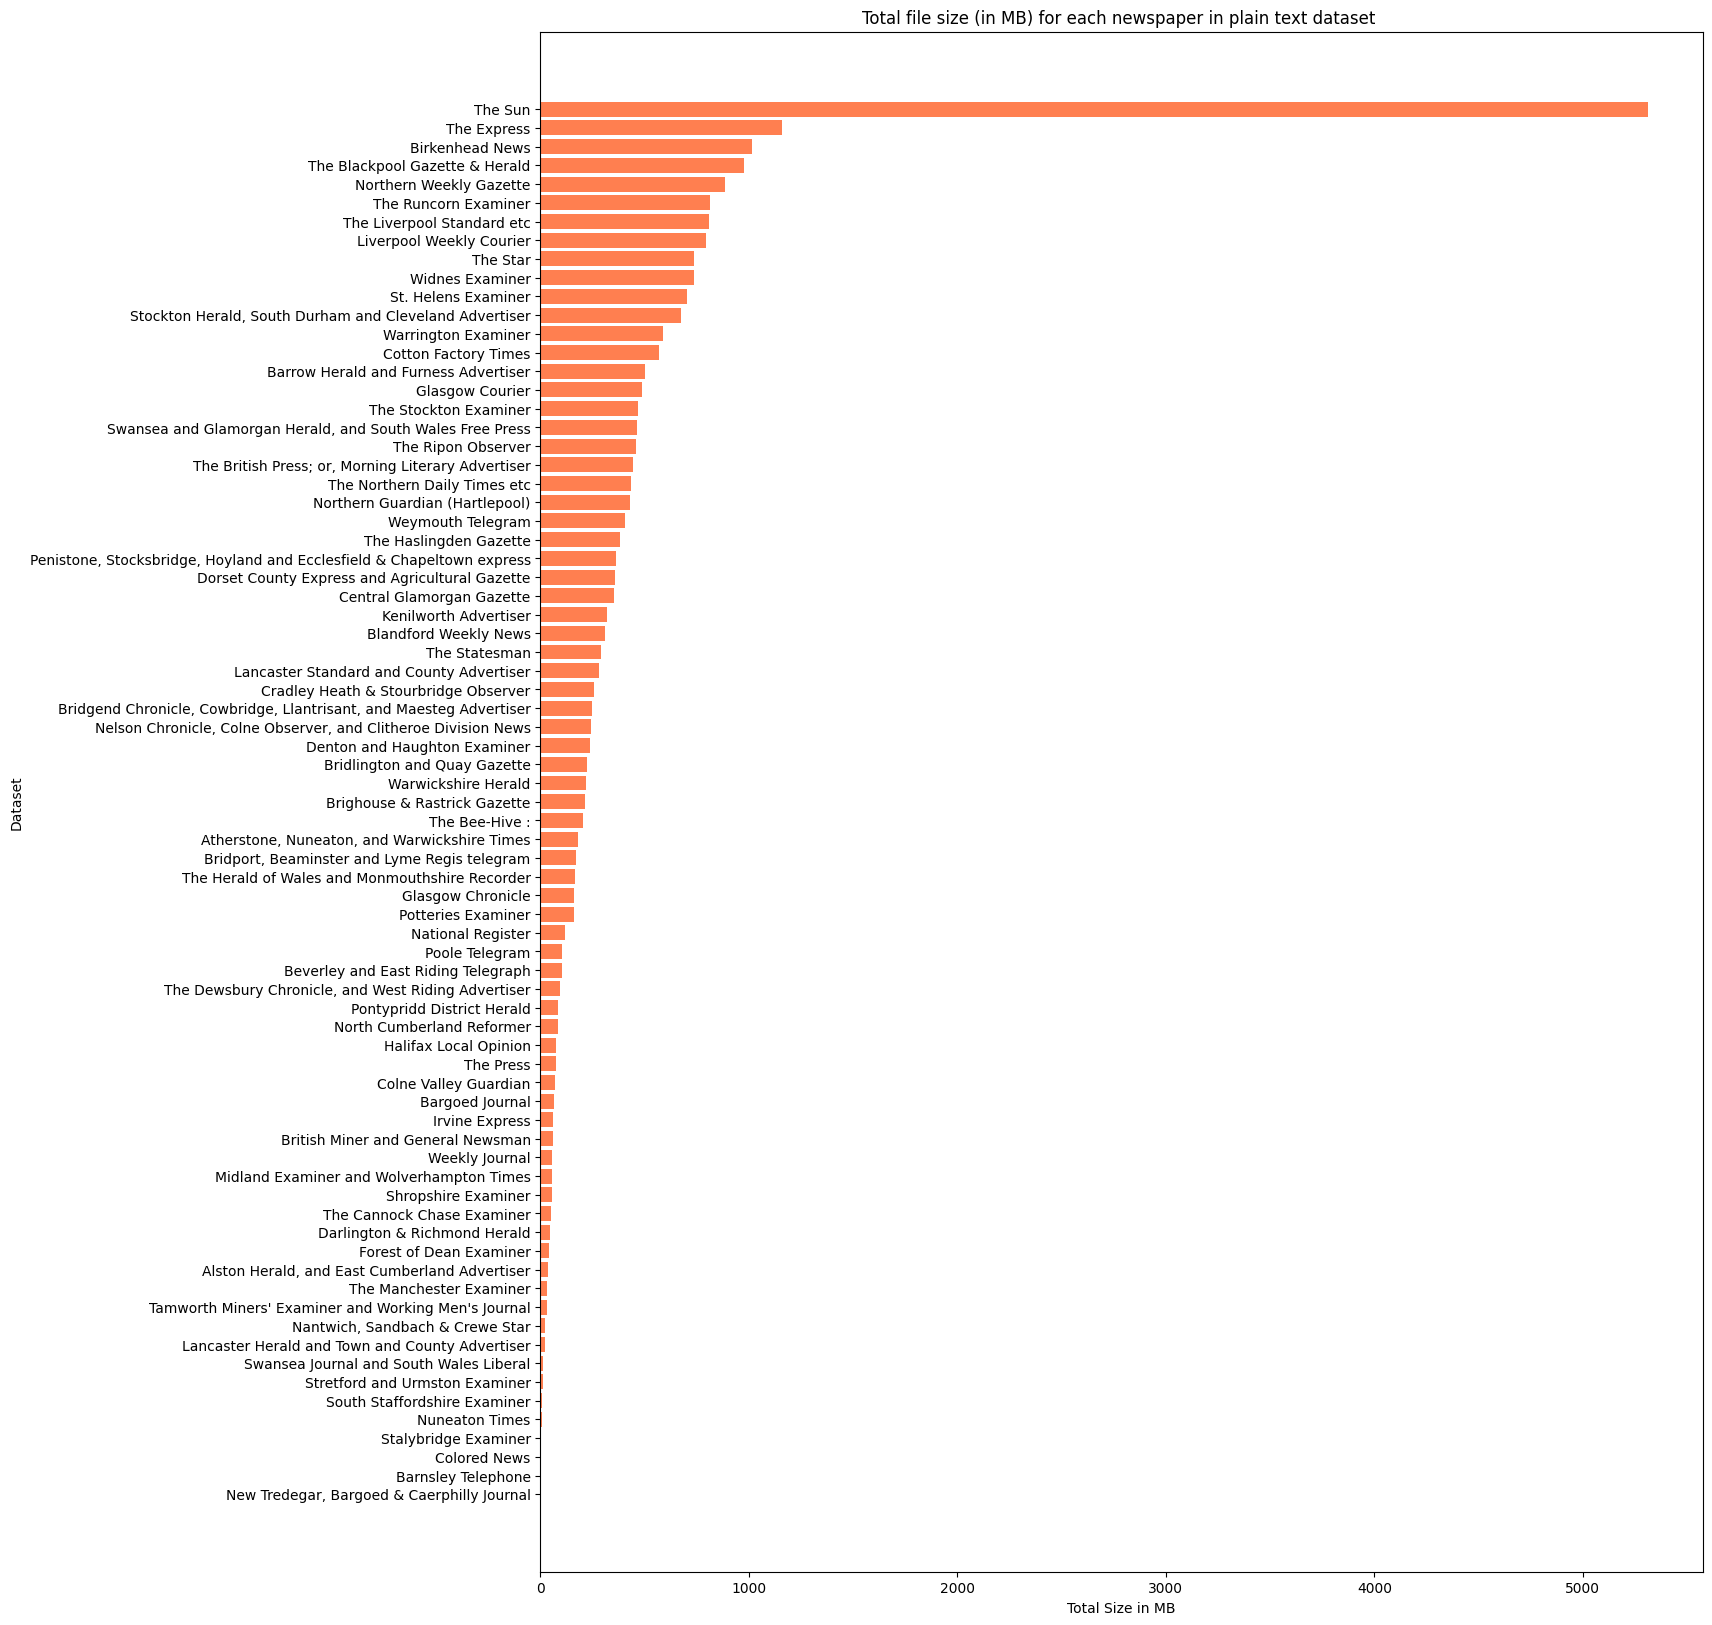

In [49]:
titles = [item["base title"] for item in size_list]
sizes = [item['total size in mb'] for item in size_list]
plt.figure(figsize=(15, 20))
plt.barh(titles, sizes, color='coral')
plt.xlabel('Total Size in MB')
plt.ylabel('Dataset')
plt.title('Total file size (in MB) for each newspaper in plain text dataset ')
plt.show()

In [36]:
size_list_alto = alto_datasets_df[['base title', 'total size in mb']].to_dict('records')
size_list_alto = sorted(size_list_alto, key=lambda i: i['total size in mb'])
size_list_alto

[{'base title': 'Halifax Local Opinion', 'total size in mb': 0.0},
 {'base title': 'Colored News', 'total size in mb': 2.3},
 {'base title': 'Weekly Journal', 'total size in mb': 10.0},
 {'base title': 'Stalybridge Examiner', 'total size in mb': 16.0},
 {'base title': 'Nuneaton Times', 'total size in mb': 41.0},
 {'base title': 'South Staffordshire Examiner', 'total size in mb': 58.0},
 {'base title': 'Swansea Journal and South Wales Liberal',
  'total size in mb': 66.1},
 {'base title': 'Stretford and Urmston Examiner', 'total size in mb': 99.0},
 {'base title': 'Lancaster Herald and Town and County Advertiser',
  'total size in mb': 124.0},
 {'base title': 'Alston Herald, and East Cumberland Advertiser',
  'total size in mb': 197.0},
 {'base title': "Tamworth Miners' Examiner and Working Men's Journal",
  'total size in mb': 221.7},
 {'base title': 'Forest of Dean Examiner', 'total size in mb': 261.0},
 {'base title': 'St. Helens Examiner', 'total size in mb': 287.0},
 {'base title':

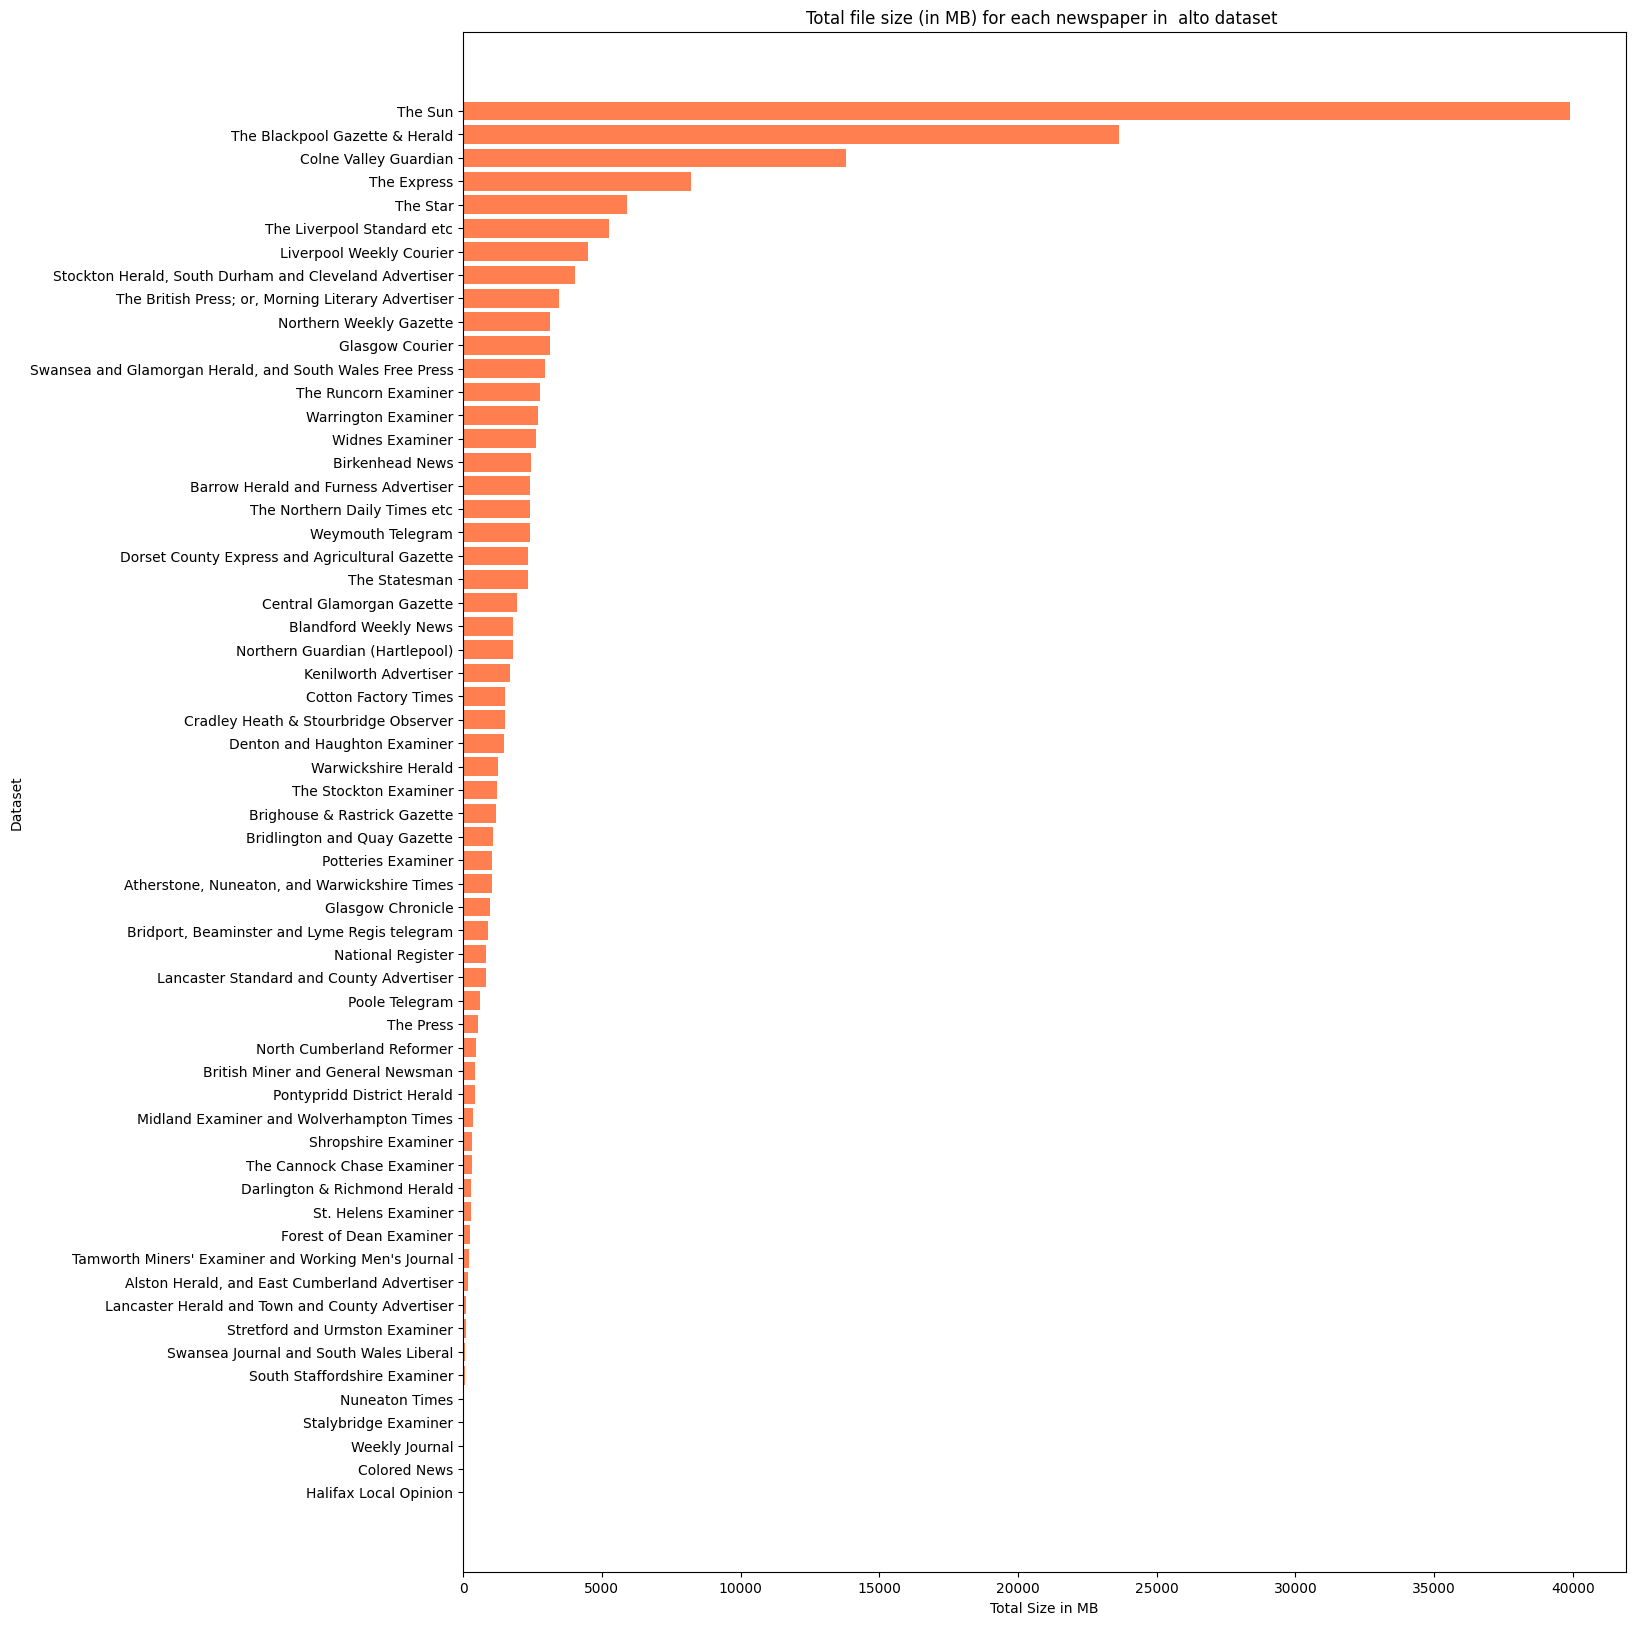

In [37]:
titles = [item["base title"] for item in size_list_alto]
sizes = [item['total size in mb'] for item in size_list_alto]
plt.figure(figsize=(15, 20))
plt.barh(titles, sizes, color='coral')
plt.xlabel('Total Size in MB')
plt.ylabel('Dataset')
plt.title('Total file size (in MB) for each newspaper in  alto dataset ')
plt.show()

### Check a specific newspaper - Glasgow Courier